In [47]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# Modelación y evaluación

In [48]:
#Leemos nuestros datos de entrenamiento
x = pd.read_csv('dataEntreno.csv')
x.head()

,production_budget,worldwide_gross,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2.783919e+09,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2.058662e+09,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,9.634204e+08,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,8.796209e+08,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,1.084439e+09,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


In [49]:
# Creamos nuestro target
y = x['worldwide_gross']
y

0       2.783919e+09
1       2.058662e+09
2       9.634204e+08
3       8.796209e+08
4       1.084439e+09
5       2.600021e+08
6       2.827781e+08
7       5.865819e+08
8       8.908753e+08
9       8.908753e+08
10      1.404706e+09
11      1.150865e+09
12      8.681602e+08
13      1.017004e+09
14      9.350837e+08
15      9.603669e+08
16      9.551198e+08
17      1.045664e+09
18      3.740851e+08
19      5.916921e+08
20      1.066216e+09
21      6.679995e+08
22      4.173413e+08
23      7.578903e+08
24      1.670328e+09
25      8.365197e+08
26      1.104039e+09
27      4.593596e+08
28      3.222416e+08
29      3.052182e+08
            ...     
4074    2.335352e+06
4075    4.241490e+05
4076    4.062990e+05
4077    8.374000e+03
4078    3.427220e+05
4079    2.772330e+05
4080    2.557200e+04
4081    3.632000e+03
4082    3.219520e+05
4083    2.437680e+05
4084    1.035090e+05
4085    8.269800e+04
4086    9.812000e+03
4087    3.894240e+06
4088    8.231000e+03
4089    2.883661e+06
4090    1.227

In [50]:
x = x.drop('worldwide_gross',axis=1)

In [51]:
x.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5


#### Modelo simple de regresión (lasso)


In [52]:
#Definimos nuestras variables de entrenamiento y de pruebas
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [53]:
print(len(x))
print(len(x_train))
print(len(x_test))

4104
3078
1026


In [54]:
x.head(2)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1


In [55]:
model = Lasso()

In [56]:
#Iniciamos el entreno de nuestro modelo
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
#Predecimos con nuestros datos de prueba
predicted = model.predict(x_test)
predicted.shape

(1026,)

In [58]:
# Graficar en Jupyter
%matplotlib inline

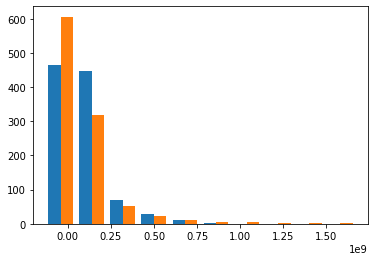

In [59]:
plt.hist([predicted,y_test]);

#### Evaluación del comportamiento de nuestro modelo

In [60]:
#Miramos el score
model.score(x_test,y_test)

0.5847766801644849

Un buen score R2 es importante para una regresión. Pero no lo es todo. De forma general los scores hay que complementarlos con visualizaciones de los datos ya que una métrica no logra siempre encodear todas las caracteristicas de una distribución de probabilidades.

In [61]:
#Miramos los residuos
residuals = y_test - predicted

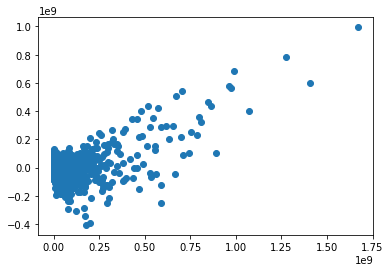

In [62]:
plt.scatter(y_test,residuals)

In [63]:
# Errores en porcentaje
ap_residuals = np.abs(residuals) / y_test

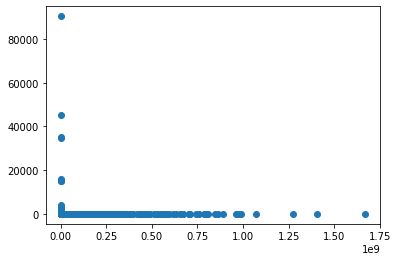

In [64]:
plt.scatter(y_test,ap_residuals)

In [65]:
#Como hay residuos muy alejados usare una escala logaritmica
ap_residuals =np.log(ap_residuals)

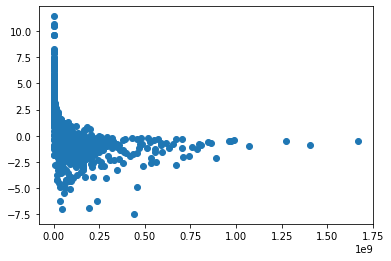

In [66]:
plt.scatter(y_test,ap_residuals)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([9.74658869e-04, 9.74658869e-04, 1.94931774e-03, 2.92397661e-03,
        2.92397661e-03, 2.92397661e-03, 4.87329435e-03, 4.87329435e-03,
        4.87329435e-03, 4.87329435e-03, 5.84795322e-03, 5.84795322e-03,
        7.79727096e-03, 9.74658869e-03, 9.74658869e-03, 1.16959064e-02,
        1.36452242e-02, 1.75438596e-02, 2.33918129e-02, 2.53411306e-02,
        2.82651072e-02, 3.21637427e-02, 3.70370370e-02, 4.19103314e-02,
        5.06822612e-02, 6.23781676e-02, 7.01754386e-02, 8.86939571e-02,
        9.74658869e-02, 1.11111111e-01, 1.34502924e-01, 1.57894737e-01,
        1.89083821e-01, 2.31968811e-01, 2.73879142e-01, 3.31384016e-01,
        3.81091618e-01, 4.35672515e-01, 4.82456140e-01, 5.13645224e-01,
        5.50682261e-01, 5.85769981e-01, 6.21832359e-01, 6.51072125e-01,
        6.86159844e-01, 7.17348928e-01, 7.35867446e-01, 7.64132554e-01,
        7.83625731e-01, 8.01169591e-01, 8.20662768e-01, 8.33333333e-01,
        8.43079922e-01, 8.58674464e-01, 8.70370370e-01, 8.898635

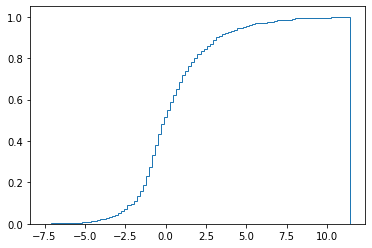

In [67]:
# Hacemos una evaluacion de errores Diagrama de escala acumulativa de distribucion de errores
# haremos un histograma, normalizado
plt.hist(ap_residuals,bins=100,normed=1,histtype='step', cumulative=True)
# para un 45% de nuestros datos hay 5% de error

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


array([0.13533528, 0.22313016, 0.36787944, 0.60653066, 1.        ])

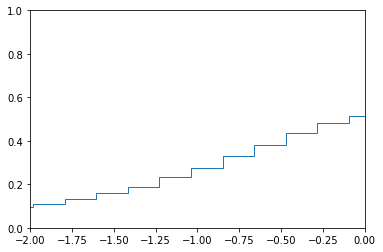

In [68]:
plt.hist(ap_residuals, bins=100, normed=1, histtype='step',cumulative=True);
plt.axis([-2,0,0,1])
np.power(np.exp(1)*np.ones(5),np.linspace(-2,0,5))

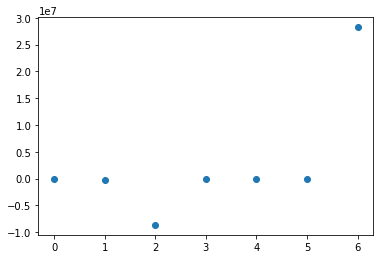

In [70]:
plt.scatter(np.arange(7),model.coef_)

In [71]:
# Calcula la matriz de correlacion
x.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765
duration,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000


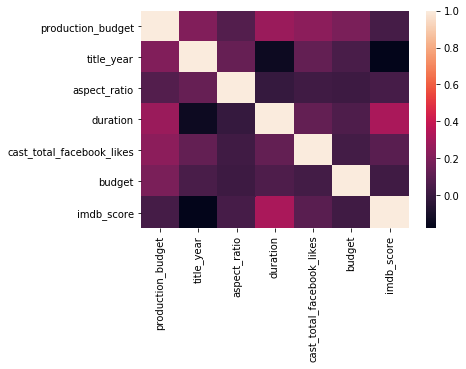

In [72]:
sb.heatmap(x.corr())